Método del Perfil Delgado

C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:24: RuntimeWarning: overflow encountered in scalar power
  L = 0.5*rho*V**2*CL*S_w
C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:27: RuntimeWarning: overflow encountered in scalar power
  D = 0.5*rho*V**2*C_D_rect*(A_f + A_t)
C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:30: RuntimeWarning: invalid value encountered in scalar add
  Fx = -D*np.cos(theta) + L*np.sin(theta)
C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:31: RuntimeWarning: invalid value encountered in scalar subtract
  Fy = L*np.cos(theta) - D*np.sin(theta) - m*g
C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:34: RuntimeWarning: overflow encountered in scalar power
  Ls = 0.5*rho*V**2*CL*S_s
C:\Users\nicoa\AppData\Local\Temp\ipykernel_27320\1104885041.py:30: RuntimeWarning: invalid value encountered in cos
  Fx = -D*np.cos(theta) + L*np.sin(theta)
C:\Users\nicoa\AppData\Local\Temp\ipykernel

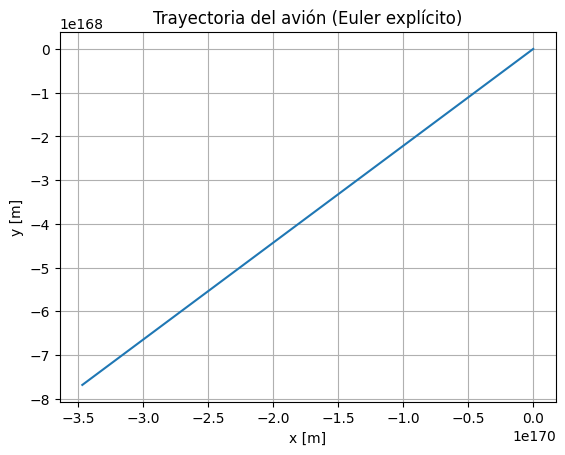

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (rellenar)
rho = 1.225
m   = 1.0e-3     # kg
I   = 0.05    # kg·m^2
S_w = 0.3     # ala
S_s = 0.1     # estabilizador
A_f = 0.05    # fuselaje área frontal
A_t = 0.03    # cola área frontal
d_stab = 0.5  # brazo de cola

C_D_rect = 1.1   # arrastre rectángulo aprox.

g = 9.81

def aero_forces(Vx, Vy, theta):
    V = np.hypot(Vx, Vy)
    alpha = theta - np.arctan2(Vy, Vx)

    # Coeficiente sustentación perfil delgado
    CL = 2*np.pi*alpha
    L = 0.5*rho*V**2*CL*S_w

    # Arrastre (4 rectángulos equivalentes)
    D = 0.5*rho*V**2*C_D_rect*(A_f + A_t)

    # Componentes
    Fx = -D*np.cos(theta) + L*np.sin(theta)
    Fy = L*np.cos(theta) - D*np.sin(theta) - m*g

    # Momento estabilizador
    Ls = 0.5*rho*V**2*CL*S_s
    Mz = Ls * d_stab

    return Fx, Fy, Mz

def euler(dt, T):
    N = int(T/dt)
    # Estado: x, y, theta, Vx, Vy, w
    y = np.zeros((N, 6))

    # Condiciones iniciales
    y[0,0] = 0      # x0
    y[0,1] = 0      # y0
    y[0,2] = 0.05   # theta0
    y[0,3] = 10     # Vx0
    y[0,4] = 0      # Vy0
    y[0,5] = 0      # w0

    for k in range(N-1):
        x, z, th, Vx, Vy, w = y[k]

        Fx, Fy, Mz = aero_forces(Vx, Vy, th)

        dx  = Vx
        dy  = Vy
        dth = w
        dVx = Fx/m
        dVy = Fy/m
        dw  = Mz/I

        y[k+1] = y[k] + dt*np.array([dx, dy, dth, dVx, dVy, dw])

    return y

# Ejecutar
dt = 0.001
T  = 5
res = euler(dt, T)

t = np.arange(0, T, dt)

plt.figure()
plt.plot(res[:,0], res[:,1])
plt.xlabel("x [m]")
plt.ylabel("y [m]")
plt.title("Trayectoria del avión (Euler explícito)")
plt.grid()
plt.show()
